In [1]:
#!pip install joblib

In [3]:
import joblib
import numpy as np
import pandas as pd
import sklearn
import imblearn
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
#from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import joblib
import numpy as np

C:\Users\Caroline\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [7]:
df_breast_cancer = pd.read_csv('df_cancerbreast.csv', low_memory=False)
df_breast_cancer.info()

In [9]:
df_breast_cancer.columns

Index(['Unnamed: 0', 'diagnosis', 'radius_mean', 'texture_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [10]:
df_breast_cancer.drop(columns=["Unnamed: 0"], inplace=True)

In [12]:
df_breast_cancer["diagnosis"].value_counts()

B    344
M    212
Name: diagnosis, dtype: int64

In [13]:
df_breast_cancer['diagnosis'], _ = pd.factorize(df_breast_cancer['diagnosis'])

In [14]:
df_breast_cancer["diagnosis"].value_counts()

1    344
0    212
Name: diagnosis, dtype: int64

In [15]:
X=df_breast_cancer.drop('diagnosis',axis=1)
y=df_breast_cancer['diagnosis']

<Axes: ylabel='diagnosis'>

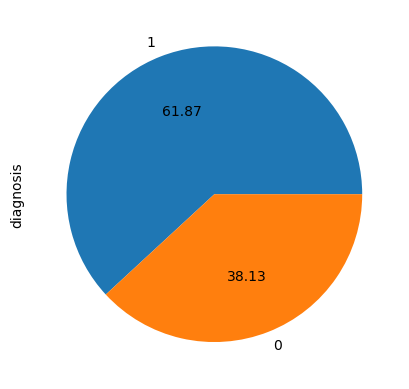

In [16]:
# Affichage actuel des classes (malades / sains)
y.value_counts().plot.pie(autopct='%.2f')

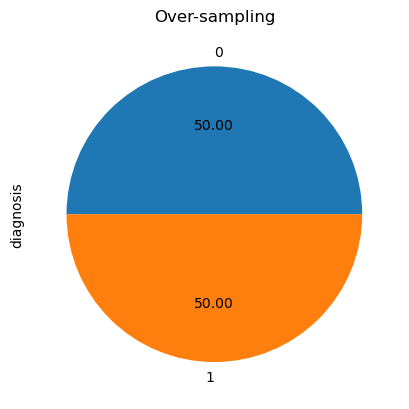

In [17]:
# Rééquilibrage et visualisation des classes après application du over-sampler
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [15]:
scaler_list1= [Normalizer(), StandardScaler(), MinMaxScaler()]
scaler_list2= [ MaxAbsScaler(), RobustScaler(),PowerTransformer()]
classifier_list= [ RandomForestClassifier(), LogisticRegression(), SVC(),
                  MLPClassifier(), XGBClassifier(), LGBMClassifier(),
                  CatBoostClassifier(), GaussianNB() ]

In [17]:
# définition d'une pipeline pour tester l'ensemble des scaler et l'ensemble des classifiers.
# la liste des scalers a été scindée en deux pour des raisons de performance.

results1= []
for scaler in scaler_list1:
    for classifier in classifier_list:
        pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
        ])
        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')
        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)
        Accuracy= accuracy_score(y_res, y_pred),
        Precision= precision_score(y_res, y_pred),
        Recall= recall_score(y_res, y_pred),
        F1_Score= f1_score(y_res, y_pred),
        ROC_AUC= roc_auc_score(y_res, y_pred)
        results1.append((classifier.__class__.__name__, scaler.__class__.__name__, 
                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))

"results1= []\nfor scaler in scaler_list1:\n    for classifier in classifier_list:\n        pipe = Pipeline([\n        ('scaler', scaler),\n        ('classifier', classifier)\n        ])\n        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')\n        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)\n        Accuracy= accuracy_score(y_res, y_pred),\n        Precision= precision_score(y_res, y_pred),\n        Recall= recall_score(y_res, y_pred),\n        F1_Score= f1_score(y_res, y_pred),\n        ROC_AUC= roc_auc_score(y_res, y_pred)\n        results1.append((classifier.__class__.__name__, scaler.__class__.__name__, \n                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))"

In [18]:
results2= []
for scaler in scaler_list2:
    for classifier in classifier_list:
        pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
        ])
        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')
        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)
        Accuracy= accuracy_score(y_res, y_pred),
        Precision= precision_score(y_res, y_pred),
        Recall= recall_score(y_res, y_pred),
        F1_Score= f1_score(y_res, y_pred),
        ROC_AUC= roc_auc_score(y_res, y_pred)
        results2.append((classifier.__class__.__name__, scaler.__class__.__name__, 
                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))

"results2= []\nfor scaler in scaler_list2:\n    for classifier in classifier_list:\n        pipe = Pipeline([\n        ('scaler', scaler),\n        ('classifier', classifier)\n        ])\n        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')\n        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)\n        Accuracy= accuracy_score(y_res, y_pred),\n        Precision= precision_score(y_res, y_pred),\n        Recall= recall_score(y_res, y_pred),\n        F1_Score= f1_score(y_res, y_pred),\n        ROC_AUC= roc_auc_score(y_res, y_pred)\n        results2.append((classifier.__class__.__name__, scaler.__class__.__name__, \n                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))"

In [19]:
results1 = pd.DataFrame(results1, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])
results2 = pd.DataFrame(results2, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])

"results1 = pd.DataFrame(results1, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])\nresults2 = pd.DataFrame(results2, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])"

In [20]:
total_result_undersampled= pd.concat([results1, results2], ignore_index = True)
total_result_undersampled.sort_values(by= ['Recall'], ascending= False)

"total_result_undersampled= pd.concat([results1, results2], ignore_index = True)\ntotal_result_undersampled.sort_values(by= ['Recall'], ascending= False)"

In [21]:
# Choix des hyperparamètres pour le classifier avec l'aide GridSearch Cross validation

# Choix du scaler
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

# Normaliser les données
scaler_cancerbreast = PowerTransformer()
scaler_cancerbreast.fit(X)

X_scaled = scaler.transform(X)

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 150],
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.001],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Créer le modèle CatBoostClassifier
CatBoost = CatBoostClassifier(random_state=42)

# Créer l'objet GridSearchCV avec validation croisée
grid_search = GridSearchCV(estimator=CatBoost, param_grid=param_grid, cv=5, scoring='accuracy')

# Adapter GridSearchCV aux données
grid_search.fit(X_scaled, y_res)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)


0:	learn: 0.6297250	total: 143ms	remaining: 7.02s
1:	learn: 0.5741195	total: 144ms	remaining: 3.46s
2:	learn: 0.5257175	total: 145ms	remaining: 2.27s
3:	learn: 0.4810518	total: 145ms	remaining: 1.67s
4:	learn: 0.4446392	total: 146ms	remaining: 1.31s
5:	learn: 0.4136673	total: 146ms	remaining: 1.07s
6:	learn: 0.3841853	total: 147ms	remaining: 900ms
7:	learn: 0.3615844	total: 147ms	remaining: 772ms
8:	learn: 0.3409060	total: 147ms	remaining: 672ms
9:	learn: 0.3221372	total: 148ms	remaining: 591ms
10:	learn: 0.3017006	total: 148ms	remaining: 526ms
11:	learn: 0.2846644	total: 149ms	remaining: 471ms
12:	learn: 0.2685520	total: 149ms	remaining: 425ms
13:	learn: 0.2568299	total: 150ms	remaining: 385ms
14:	learn: 0.2444187	total: 150ms	remaining: 350ms
15:	learn: 0.2332553	total: 151ms	remaining: 320ms
16:	learn: 0.2222304	total: 151ms	remaining: 293ms
17:	learn: 0.2137514	total: 152ms	remaining: 269ms
18:	learn: 0.2082779	total: 152ms	remaining: 248ms
19:	learn: 0.2009484	total: 152ms	remaini

In [18]:
# Entrainer le modèle avec les hyperparamètres récupérés

# Normaliser les données
scaler_cancerbreast = PowerTransformer()
X_scaled = scaler_cancerbreast.fit_transform(X_res)

# sauvegarde du scaler
joblib.dump(scaler_cancerbreast, 'ScalePwrTransf_Cancerbreast.joblib')

# spliter X pour train test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, random_state=2)


# Entrainer le modèleCatBoostClassifierClassifier
CatBoostClassifier_cancerbreast = CatBoostClassifier(depth= 4, l2_leaf_reg= 1, learning_rate= 0.1, n_estimators= 100)

CatBoostClassifier_cancerbreast.fit(X_train, y_train)

# Compare test and train score (accuracy score)
print("\nScore for the Train dataset :", CatBoostClassifier_cancerbreast.score(X_train, y_train))
print("Score for the Test dataset :", CatBoostClassifier_cancerbreast.score(X_test, y_test))



0:	learn: 0.6292409	total: 135ms	remaining: 13.3s
1:	learn: 0.5741251	total: 136ms	remaining: 6.67s
2:	learn: 0.5321701	total: 137ms	remaining: 4.43s
3:	learn: 0.4882822	total: 138ms	remaining: 3.31s
4:	learn: 0.4532974	total: 139ms	remaining: 2.63s
5:	learn: 0.4202492	total: 140ms	remaining: 2.19s
6:	learn: 0.3922205	total: 140ms	remaining: 1.86s
7:	learn: 0.3645258	total: 141ms	remaining: 1.62s
8:	learn: 0.3393321	total: 142ms	remaining: 1.44s
9:	learn: 0.3192782	total: 143ms	remaining: 1.29s
10:	learn: 0.3016769	total: 144ms	remaining: 1.16s
11:	learn: 0.2827408	total: 145ms	remaining: 1.06s
12:	learn: 0.2669835	total: 146ms	remaining: 974ms
13:	learn: 0.2547088	total: 146ms	remaining: 899ms
14:	learn: 0.2415405	total: 147ms	remaining: 834ms
15:	learn: 0.2334764	total: 148ms	remaining: 777ms
16:	learn: 0.2251285	total: 149ms	remaining: 727ms
17:	learn: 0.2127561	total: 150ms	remaining: 682ms
18:	learn: 0.2028553	total: 151ms	remaining: 642ms
19:	learn: 0.1940079	total: 151ms	remaini

In [28]:
# sauvegarde du modèle

joblib.dump(CatBoostClassifier_cancerbreast, 'CastBoost_Cancerbreast.joblib')

['CastBoost_Cancerbreast.joblib']

In [24]:
'''on stocke le modèle dans github et dans sublim text, on scale nos X puis on les prédit avec ce modèle.'''

'on stocke le modèle dans github et dans sublim text, on scale nos X puis on les prédit avec ce modèle.'

In [50]:
my_data

array([[13.49  , 22.3   ,  0.0875,  0.077 ,  0.0475,  0.0338,  0.1809,
         0.0572]])

In [92]:
df_breast_cancer.loc[df_breast_cancer['diagnosis']==0].head(6)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,0,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,0,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,0,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,0,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
5,0,12.45,15.70,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


In [19]:
# matrice de confusion

from sklearn.metrics import confusion_matrix

# Convertir les classes en chaînes de caractères
classes_str = [str(c) for c in CatBoostClassifier_cancerbreast.classes_]

# Créer la matrice de confusion avec des noms de classes
confusion_df = pd.DataFrame(data=confusion_matrix(y_true=y_test, y_pred=CatBoostClassifier_cancerbreast.predict(X_test)),
                             index=[f"{c} ACTUAL" for c in classes_str],
                             columns=[f"{c} PREDICTED" for c in classes_str])

print(confusion_df)

          0 PREDICTED  1 PREDICTED
0 ACTUAL           75            4
1 ACTUAL            3           90


In [99]:
mean_radius = 13.54
mean_texture = 14.36
mean_smoothness = 0.09779
mean_compactness = 0.08129
mean_concavity = 0.06664
mean_concave_points = 0.04781
mean_symmetry = 0.1885
mean_fractal_dimension = 0.05766

my_data = np.array([[mean_radius, mean_texture, mean_smoothness, mean_compactness, 
                    mean_concavity, mean_concave_points, mean_symmetry, mean_fractal_dimension]])
#my_data= df_breast_cancer.loc[df_breast_cancer['diagnosis']==0].head(22).drop('diagnosis',axis=1)


#Ajustement du scaler aux données à prédire
my_data_scaled = scaler_cancerbreast.transform(my_data)


#predictions = CatBoostClassifier_cancerbreast.predict(X_scaled)

predictions = CatBoostClassifier_cancerbreast.predict(my_data_scaled)

predictions[0]

1